In [2]:
import pandas as pd
from IPython.display import display

#------------------PCA降維-------------------------------------------------

X = pd.read_csv(r'./tfidf_min0.005_pos_matrix_0824.csv', encoding='utf-8') #0809做過
X = X.drop(['Unnamed: 0'], axis=1)
print(X.shape)

(22486, 24)


In [4]:
display(X.head(5))

,balanced,bitter,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,...,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.556055,0.0,0.0,0.831145,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [5]:
# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = X.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

各特徵平均與標準差：


,balanced,bitter,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,little,old,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
mean,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.01
std,0.07,0.09,0.07,0.10,0.08,0.07,0.11,0.09,0.11,0.08,0.07,0.07,0.09,0.08,0.09,0.09,0.10,0.09,0.09,0.08,0.07,0.07,0.15,0.08


In [6]:
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal

In [9]:
# 將類型以外的 11 個特徵全取出
X = X.iloc[:, 1:]  # (n_samples, n_features)
X

,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,...,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.556055,0.0,0.0,0.831145,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
22482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
22483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
22484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [11]:
# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度
Z_sk

array([[-0.08794423, -0.12039912, -0.09407866, ..., -0.08755367,
        -0.20379691, -0.08990736],
       [-0.08794423, -0.12039912, -0.09407866, ..., -0.08755367,
        -0.20379691, -0.08990736],
       [-0.08794423, -0.12039912, 13.11741283, ..., -0.08755367,
        -0.20379691, -0.08990736],
       ...,
       [-0.08794423, -0.12039912, -0.09407866, ..., -0.08755367,
        -0.20379691, -0.08990736],
       [-0.08794423, -0.12039912, -0.09407866, ..., -0.08755367,
        -0.20379691, -0.08990736],
       [-0.08794423, -0.12039912, -0.09407866, ..., -0.08755367,
        -0.20379691, -0.08990736]])

In [16]:
# 手動正規化當然也能得到跟 scikit-learn API 相同的結果
# 注意我們有所有英雄數據（母體）而非抽樣，自由度 = 0
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新我們的 DataFrame
X.iloc[:, 1:] = Z
X

,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,...,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
0,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
1,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,11.406727,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
2,0.0,-0.120399,13.117413,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
3,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,6.936221,-0.089171,-0.087554,5.197723,-0.089907
4,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,11.442337,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
22482,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
22483,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907
22484,0.0,-0.120399,-0.094079,-0.09192,-0.145805,-0.105905,-0.129879,-0.097837,-0.090387,-0.091557,...,-0.110925,-0.108447,-0.119925,-0.108453,-0.109248,-0.102073,-0.089171,-0.087554,-0.203797,-0.089907


In [18]:
# 展示前 5 rows
print("正規化後前五名英雄數據：")
display(X.head(5).style\
        .format("{:.2f}", subset=X.columns[1:]))

正規化後前五名英雄數據：


,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,little,old,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
0,0.000000,-0.12,-0.09,-0.09,-0.15,-0.11,-0.13,-0.10,-0.09,-0.09,-0.12,-0.10,-0.11,-0.11,-0.12,-0.11,-0.11,-0.10,-0.09,-0.09,-0.20,-0.09
1,0.000000,-0.12,-0.09,-0.09,-0.15,-0.11,-0.13,-0.10,-0.09,-0.09,-0.12,-0.10,11.41,-0.11,-0.12,-0.11,-0.11,-0.10,-0.09,-0.09,-0.20,-0.09
2,0.000000,-0.12,13.12,-0.09,-0.15,-0.11,-0.13,-0.10,-0.09,-0.09,-0.12,-0.10,-0.11,-0.11,-0.12,-0.11,-0.11,-0.10,-0.09,-0.09,-0.20,-0.09
3,0.000000,-0.12,-0.09,-0.09,-0.15,-0.11,-0.13,-0.10,-0.09,-0.09,-0.12,-0.10,-0.11,-0.11,-0.12,-0.11,-0.11,6.94,-0.09,-0.09,5.20,-0.09
4,0.000000,-0.12,-0.09,-0.09,-0.15,-0.11,-0.13,-0.10,-0.09,-0.09,-0.12,-0.10,-0.11,-0.11,-0.12,-0.11,-0.11,-0.10,-0.09,-0.09,-0.20,-0.09


In [19]:
# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = X.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

各特徵平均與標準差：


,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,little,old,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
mean,0.01,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,0.07,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


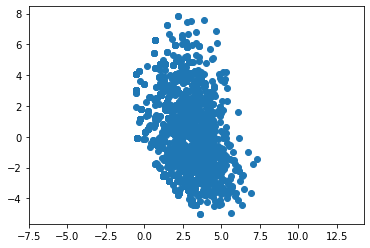

In [37]:
"""
透過 scikit-learn 將 11 維的 LOL 英雄數據降到 2 維
"""
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 3
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');

In [42]:
"""
解析英雄數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
import numpy as np
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=X.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二','三']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.1}")



,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,interesting,light,little,old,orange,original,refreshing,rich,simple,sour,strong,subtle,sweet,white
第一主成分,0.01,0.08,0.2,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.2,0.3,0.2,0.06,0.1,0.3,0.3,0.1,0.2,0.4,0.1
第二主成分,0.3,0.05,-0.1,-0.2,0.2,0.1,0.2,0.4,0.05,0.3,-0.1,-0.2,-0.2,-0.2,0.2,0.3,-0.3,-0.1,-0.2,0.3,-0.05,-0.04
第三主成分,-0.04,-0.04,-0.2,0.07,-0.2,0.05,0.4,-0.3,-0.3,0.3,0.1,-0.2,-0.1,-0.3,0.4,-0.04,0.001,0.2,0.2,-0.2,0.2,0.01


In [33]:
pca_10d = PCA(10, random_state=random_state)
pca_10d.fit(Z)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04])

In [35]:
X['name'].unique()

KeyError: 'name'